In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/rammaruthi/Desktop/AI TRAINING/Datasets/pima-indians-diabetes.csv')
df

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
762,10,101,76,48,180,32.9,0.171,63,0
763,2,122,70,27,0,36.8,0.340,27,0
764,5,121,72,23,112,26.2,0.245,30,0
765,1,126,60,0,0,30.1,0.349,47,1


In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()



In [10]:
X = df.drop('1',axis=1)
y= df['1']
X

,6,148,72,35,0,33.6,0.627,50
0,1,85,66,29,0,26.6,0.351,31
1,8,183,64,0,0,23.3,0.672,32
2,1,89,66,23,94,28.1,0.167,21
3,0,137,40,35,168,43.1,2.288,33
4,5,116,74,0,0,25.6,0.201,30
...,...,...,...,...,...,...,...,...
762,10,101,76,48,180,32.9,0.171,63
763,2,122,70,27,0,36.8,0.340,27
764,5,121,72,23,112,26.2,0.245,30
765,1,126,60,0,0,30.1,0.349,47


In [13]:
X = sc.fit_transform(X)

In [14]:
X

array([[-0.84372629, -1.12208597, -0.16024856, ..., -0.68372895,
        -0.36426474, -0.18894038],
       [ 1.23423997,  1.94447577, -0.26357823, ..., -1.10230105,
         0.60470064, -0.1037951 ],
       [-0.84372629, -0.99692019, -0.16024856, ..., -0.49346891,
        -0.91968415, -1.0403932 ],
       ...,
       [ 0.343683  ,  0.0044061 ,  0.14974046, ..., -0.73446496,
        -0.68423462, -0.27408566],
       [-0.84372629,  0.16086333, -0.47023757, ..., -0.23978884,
        -0.37030191,  1.17338414],
       [-0.84372629, -0.8717544 ,  0.04641078, ..., -0.20173684,
        -0.47293375, -0.87010264]])

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [17]:
from sklearn.naive_bayes import GaussianNB

In [18]:
model = GaussianNB()


In [19]:
model.fit(X_train,y_train)

GaussianNB()

In [20]:
train_pred = model.predict(X_train)

In [22]:
test_pred = model.predict(X_test)

In [24]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [25]:
confusion_matrix(test_pred,y_test)

array([[84, 17],
       [16, 37]])

In [28]:
model.score(X_test,y_test)

0.7857142857142857

In [36]:
y_predprob = model.predict(X_test)
y_predprob

array([0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0])

In [33]:
from sklearn.metrics import auc, roc_curve

In [34]:
tn,fp,fn,tp = confusion_matrix(test_pred,y_test).ravel()

In [37]:
fpr , tpr, threshold  = roc_curve(y_test, test_pred) 

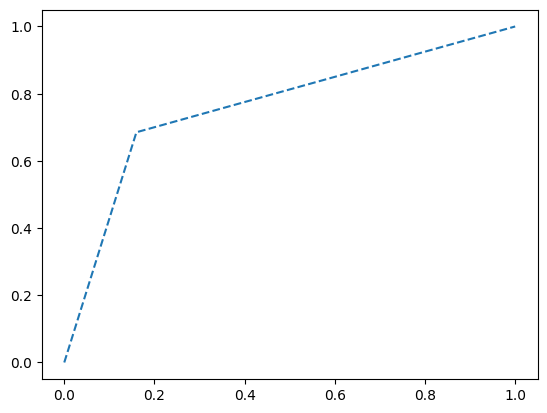

In [40]:
plt.plot(fpr,tpr,linestyle = '--')

In [39]:
auc(fpr,tpr)

0.7625925925925925